This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. No rocket science involved, but still useful.

# Load some data

In [21]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10,True)
X_train, X_val, y_train, y_val = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
y_val

(1347, 64)
(1347,)
(450, 64)
(450,)


array([4, 6, 5, 0, 7, 0, 4, 3, 9, 1, 7, 8, 9, 9, 5, 5, 4, 9, 5, 3, 1, 4, 0,
       8, 6, 8, 9, 7, 0, 6, 9, 2, 2, 4, 6, 7, 2, 4, 6, 0, 1, 7, 1, 6, 2, 8,
       6, 3, 6, 1, 7, 1, 4, 8, 4, 6, 2, 1, 2, 5, 4, 8, 8, 9, 6, 2, 1, 3, 2,
       8, 6, 1, 8, 3, 1, 1, 9, 0, 4, 6, 6, 0, 9, 3, 1, 6, 3, 2, 9, 7, 3, 6,
       9, 1, 1, 8, 7, 3, 0, 7, 8, 2, 9, 0, 1, 4, 8, 7, 3, 4, 8, 8, 9, 2, 1,
       1, 7, 3, 5, 3, 0, 2, 6, 3, 2, 6, 7, 9, 5, 2, 1, 4, 4, 1, 6, 0, 9, 6,
       9, 8, 7, 2, 6, 8, 8, 5, 7, 9, 1, 4, 8, 7, 9, 1, 4, 3, 8, 9, 6, 1, 8,
       0, 0, 7, 5, 7, 6, 8, 1, 9, 9, 9, 3, 0, 9, 4, 5, 8, 2, 3, 3, 3, 4, 4,
       4, 4, 1, 5, 8, 7, 2, 0, 1, 7, 6, 5, 3, 9, 9, 5, 8, 5, 7, 7, 3, 1, 6,
       5, 8, 6, 2, 5, 3, 6, 4, 0, 5, 9, 2, 6, 7, 7, 9, 3, 4, 7, 9, 6, 4, 7,
       6, 5, 6, 0, 8, 2, 8, 3, 6, 1, 2, 0, 0, 8, 3, 2, 7, 1, 8, 5, 7, 7, 6,
       6, 4, 3, 5, 4, 2, 2, 8, 9, 2, 3, 7, 8, 5, 0, 7, 5, 7, 0, 7, 2, 0, 8,
       5, 7, 6, 0, 2, 6, 6, 5, 1, 6, 2, 7, 2, 7, 9, 5, 8, 3, 8, 2, 3, 3, 7,
       3, 5,

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [23]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [24]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])
print(len(predictions))
print(predictions[1].shape)
predictions[:5]

500
(1, 450, 10)


[array([[[ 0.01526718,  0.02290076,  0.53435115, ...,  0.21374046,
           0.05343511,  0.00763359],
         [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
           0.        ,  0.02158273],
         [ 0.        ,  0.07874016,  0.03149606, ...,  0.        ,
           0.00787402,  0.11811024],
         ..., 
         [ 0.        ,  0.48630137,  0.01369863, ...,  0.00684932,
           0.37671233,  0.02739726],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
           0.        ,  0.02158273]]]),
 array([[[ 0.94444444,  0.        ,  0.        , ...,  0.01388889,
           0.        ,  0.        ],
         [ 0.        ,  0.25      ,  0.05      , ...,  0.        ,
           0.1       ,  0.        ],
         [ 0.        ,  0.01204819,  0.14457831, ...,  0.02811245,
           0.18473896,  0.04819277],
         ..., 
         [ 0.        ,  0.01204

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [25]:
predictions = np.vstack(predictions)
print(predictions.shape)
predictions[:5]

(500, 450, 10)


array([[[ 0.01526718,  0.02290076,  0.53435115, ...,  0.21374046,
          0.05343511,  0.00763359],
        [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
          0.        ,  0.02158273],
        [ 0.        ,  0.07874016,  0.03149606, ...,  0.        ,
          0.00787402,  0.11811024],
        ..., 
        [ 0.        ,  0.48630137,  0.01369863, ...,  0.00684932,
          0.37671233,  0.02739726],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
          0.        ,  0.02158273]],

       [[ 0.94444444,  0.        ,  0.        , ...,  0.01388889,
          0.        ,  0.        ],
        [ 0.        ,  0.25      ,  0.05      , ...,  0.        ,
          0.1       ,  0.        ],
        [ 0.        ,  0.01204819,  0.14457831, ...,  0.02811245,
          0.18473896,  0.04819277],
        ..., 
        [ 0.        ,  0.01204819,  0.14457831, ...,

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [26]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
print(len(cum_mean))
cum_mean[:5]

500


array([[[ 0.01526718,  0.02290076,  0.53435115, ...,  0.21374046,
          0.05343511,  0.00763359],
        [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
          0.        ,  0.02158273],
        [ 0.        ,  0.07874016,  0.03149606, ...,  0.        ,
          0.00787402,  0.11811024],
        ..., 
        [ 0.        ,  0.48630137,  0.01369863, ...,  0.00684932,
          0.37671233,  0.02739726],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.03597122, ...,  0.        ,
          0.        ,  0.02158273]],

       [[ 0.47985581,  0.01145038,  0.26717557, ...,  0.11381467,
          0.02671756,  0.00381679],
        [ 0.        ,  0.125     ,  0.04298561, ...,  0.        ,
          0.05      ,  0.01079137],
        [ 0.        ,  0.04539418,  0.08803719, ...,  0.01405622,
          0.09630649,  0.0831515 ],
        ..., 
        [ 0.        ,  0.24917478,  0.07913847, ...,

**Step 5:** Get accuracy scores for each `n_estimators` value

In [29]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))
print(len(scores))
scores[:5]

500


[0.59777777777777774,
 0.71999999999999997,
 0.76222222222222225,
 0.76888888888888884,
 0.7844444444444445]

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

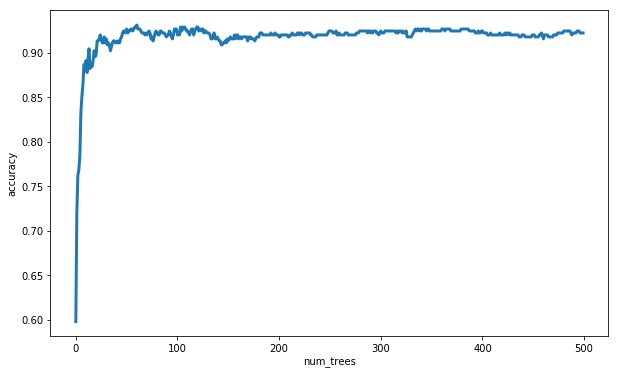

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.